# Probability in Python

# Estimating probability by simulation - Monte Carlo

The probability of an event $A$ can be estimated as follows. We can simulate the experiment repeatedly and independently, say $N$ times, and count the number of times the event occurred, say $N_A$.

A good estimate of $P(A)$ is the following:
$$P(A) \approx \frac{N_A}{N}$$
As $N$ grows larger and larger, the estimate becomes better and better. This method is generally termed as Monte Carlo simulation.

# Birthday problem

In a group of $n$ persons, what is the chance that some two have the same birthday? Assume birthday of a person is uniformly distributed in $\{1,2,\ldots,365\}$ and is independent of all other birthdays. Most people will think that you need at least 100 persons before you start seeing same birthdays. However, surprisingly perhaps, even with 23 persons there is a 50% chance of two sharing a birthday.

Event $A$: some two have same birthday

Event $A^c$: no two have same birthday

$A^c$: (Birthday 1 on any date $B_1$) and (Birthday 2 on any date other than $B_1$) and (Birthday 3 on any date other than $B_1$, $B_2$) and ... and (Birthday $n$ on any day other than $B_1,B_2,\ldots,B_{n-1}$)

$P(A^c)= 1 \cdot \left(1 - \frac{1}{365}\right)\left(1 - \frac{2}{365}\right)\cdots\left(1 - \frac{n-1}{365}\right)$

If $n=10$, what is the chance? If $n=30$, what is the chance?


In [ ]:
import numpy as np
import pandas as pd

results = []
for number_of_people in np.arange(5,130,5):
  probability = 1
  for count in range(1, number_of_people+1):
    probability *= (365-count+1)/365
  results.append({
      'n': number_of_people,
      'p(n)': (1-probability)
  })
print(pd.DataFrame(results))

      n      p(n)
0     5  0.027136
1    10  0.116948
2    15  0.252901
3    20  0.411438
4    25  0.568700
5    30  0.706316
6    35  0.814383
7    40  0.891232
8    45  0.940976
9    50  0.970374
10   55  0.986262
11   60  0.994123
12   65  0.997683
13   70  0.999160
14   75  0.999720
15   80  0.999914
16   85  0.999976
17   90  0.999994
18   95  0.999999
19  100  1.000000
20  105  1.000000
21  110  1.000000
22  115  1.000000
23  120  1.000000
24  125  1.000000


From the table above that we derived analytically, we can see that at 30 people, the probability of having a shared birthday is nearly 70%. So, for our experiment, let’s run the monte carlo simulation with N=30.

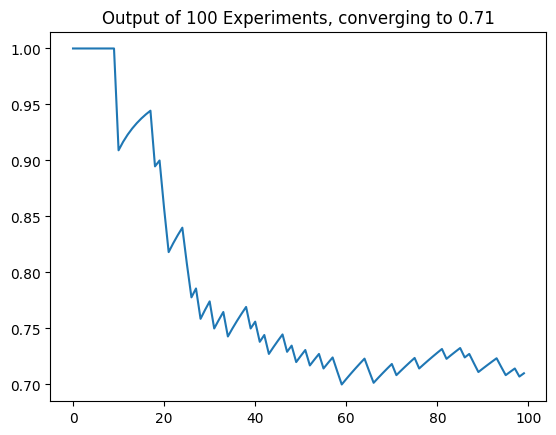

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(10)

def contains_duplicates(X):
    return len(np.unique(X)) != len(X)


shared_birthday = 0
total_number_of_experiments = 0
probabilities = []
number_of_people = 30
for experiment_index in range(0,100):

  # assign dates to people
  dates = np.random.choice(range(1,366), size=(number_of_people))

  # check if there are duplicates
  if contains_duplicates(dates):
    shared_birthday+=1 # increment shared birthday

  total_number_of_experiments += 1 # increment count

  probability = shared_birthday/total_number_of_experiments
  probabilities.append(probability)

plt.plot(probabilities)
plt.title("Output of 100 Experiments, converging to " + str(probabilities[-1]))
plt.show()

As can be seen in the charts above, the probability is converging to our theoretical value of 0.70 for 30 people.